# ViewJets
A notebook that plots reco jets and parton jets in eta phi space.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [9]:
data = np.loadtxt("../data/txt/jetInfo.txt")

In [10]:
print(data.shape)

(2748762, 9)


Following cell will take the first event number, iterate through the array until it reaches an entry with a different event number, and plot every reco and gen jet with size proportional to transverse momentum. The index of the first entry with the next event number is printed, and you can put than in the ```i= ``` spot to go through the next event. (for example if ```43``` is printed, change the first line of the cell to ```i=43``` to view the next event)

[ 0.10386543  0.16913144 -0.04978986]
[ 0.10386543  0.16913144 -0.04978986]
[ 0.10386543  0.16913144 -0.04978986]
[ 0.10386543  0.16913144 -0.04978986]
Next starting index: 858


[]

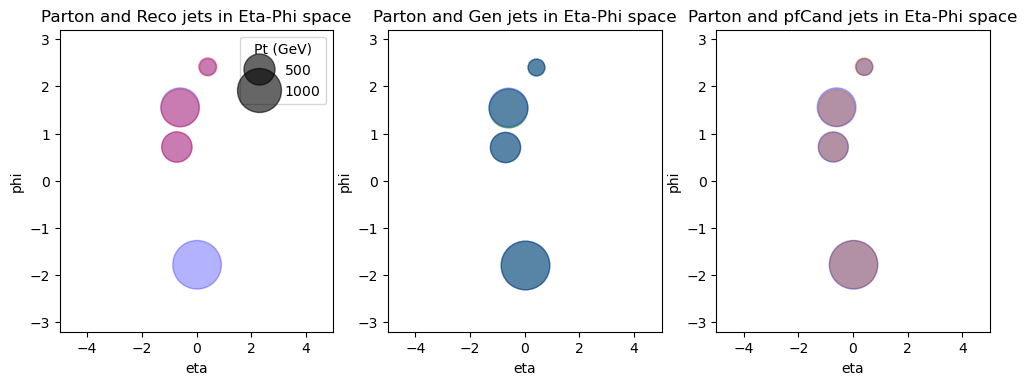

In [32]:
i = 662
eventNumber = data[i, 1]

fig = plt.figure(figsize=[12,4], dpi=100)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.set_xlabel("eta")
ax1.set_ylabel("phi")
ax1.set_title("Parton and Reco jets in Eta-Phi space")
ax1.set_ylim(-3.2, 3.2)
ax1.set_xlim(-5, 5)
ax2.set_xlabel("eta")
ax2.set_ylabel("phi")
ax2.set_title("Parton and Gen jets in Eta-Phi space")
ax2.set_ylim(-3.2, 3.2)
ax2.set_xlim(-5, 5)
ax3.set_xlabel("eta")
ax3.set_ylabel("phi")
ax3.set_title("Parton and pfCand jets in Eta-Phi space")
ax3.set_ylim(-3.2, 3.2)
ax3.set_xlim(-5, 5)

partonEtas = []
partonPhis = []
partonPts = []
recoEtas = []
recoPhis = []
recoPts = []

pfEtas = []
pfPhis = []
pfPts= []

Vx = []
Vy = []
Vz = []

while(eventNumber == data[i, 1]):
    #if (data[i, 0] == 2 and data[i, 2] == 1):
    if (data[i, 0] == 3 and data[i, 3] > 30):
        pfEtas.append(data[i, 4])
        pfPhis.append(data[i, 5])
        pfPts.append(data[i, 3])
    if (data[i, 0] == 2 and data[i, 3] > 20):
        recoEtas.append(data[i, 4])
        recoPhis.append(data[i, 5])
        recoPts.append(data[i, 3])
    if (data[i, 0] == 1 and data[i, 3] > 30):
        ax2.scatter(data[i, 4], data[i, 5], c='g', alpha=0.5, s=data[i, 3])
    if (data[i, 0] == 0 and data[i, 3] > 20):
    #if (data[i, 0] == 0):
        Vx.append(data[i, 6])
        Vy.append(data[i, 7])
        Vz.append(data[i, 8])
        print(data[i, 6:])
        partonEtas.append(data[i, 4])
        partonPhis.append(data[i, 5])
        partonPts.append(data[i, 3])
        ax2.scatter(data[i, 4], data[i, 5], c='b', s=data[i, 3], alpha=0.3)
    i += 1
print("Next starting index: {}".format(i))
scatter = ax1.scatter(partonEtas, partonPhis, s=partonPts, c='b', alpha=0.3, label="parton")
ax1.scatter(recoEtas, recoPhis, s=recoPts, c='r', alpha=0.3, label="parton")
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6, num=3)
legend2 = ax1.legend(handles, labels, loc="upper right", title="Pt (GeV)")
ax3.scatter(pfEtas, pfPhis, s=pfPts, c='orange', alpha=0.5)
ax3.scatter(partonEtas, partonPhis, s=partonPts, c='b', alpha=0.3, label="parton")
#ax1.legend(loc="lower left")
plt.plot()

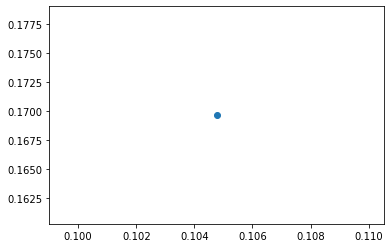

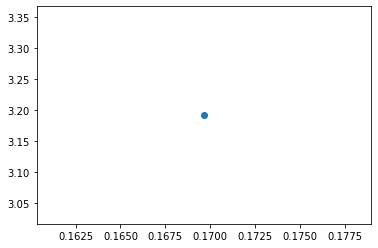

(-3.2, 3.2)

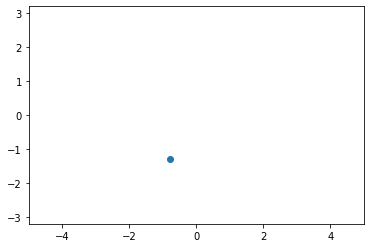

In [5]:
plt.scatter(Vx, Vy)
plt.show()
plt.scatter(Vy, Vz)
plt.show()
plt.scatter(partonEtas[:3], partonPhis[:3])
plt.xlim(-5, 5)
plt.ylim(-3.2, 3.2)

In [44]:
for i in range(len(Vx)):
    for j in range(len(Vy)):
        distance = ((Vx[i]-Vx[j])**2 + (Vy[i]-Vy[j])**2 + (Vz[i]-Vz[j])**2)**(1/2)
        print(distance)

0.0
7.499999996052331e-09
7.499999996052331e-09
7.499999996052331e-09
7.499999996052331e-09
0.0
0.0
0.0
7.499999996052331e-09
0.0
0.0
0.0
7.499999996052331e-09
0.0
0.0
0.0
